In [141]:
from pytket.extensions.nexus import Nexus, QuantinuumConfig
#from pytket.extensions.quantinuum import QuantinuumBackend
from pytket.extensions.nexus.backends import NexusBackend
from pytket.backends.resulthandle import ResultHandle
from pytket import Circuit
from pytket.unit_id import BitRegister
from pytket.circuit.display import render_circuit_jupyter
import networkx as nx
import matplotlib.pyplot as plt
import math as ma 
import numpy as np
import random as rm
import pandas as pd
import re
import copy
import warnings
import sympy as sy
import itertools
import ast

import sys
from datetime import datetime
sys.path.append('/home/jovyan/BenchmarkingQuantinuumH1/src')
today_date = datetime.today().strftime('%Y%m%d')
n_shots = 5000
num_qubits = 5
data_path = '/home/jovyan/BenchmarkingQuantinuumH1/data/'
fig_path =  '/home/jovyan/BenchmarkingQuantinuumH1/fig/'
file_name = 'test_hadamard_randomness_per_shots.csv'

emulator_name = 'H1-1LE'
data_name = data_path + today_date + '_'+ 'backend' + '_' + emulator_name + '_' + 'shots' + '_' + str(n_shots) + '_' + 'qubits' + '_' + str(num_qubits) + '_' + file_name
fig_name = fig_path  + today_date + '_'+ 'backend' + '_' + emulator_name + '_' + 'shots' + '_' + str(n_shots) + '_' + 'qubits' + '_' + str(num_qubits) + '_'

import bitwise_operations as bo
import helper_functions as hf
import circuits_version_02 as cv2

boc = bo.BitwiseOperations()

In [142]:
if emulator_name == "H1-1E":
    my_new_quantinuum_exp = Nexus().get_project_by_name("UBQC")
    configuration = QuantinuumConfig(device_name=emulator_name, user_group="Default")
    backend = NexusBackend(configuration, my_new_quantinuum_exp)
elif emulator_name == "H1-1LE":
    from pytket.extensions.quantinuum import QuantinuumBackend, QuantinuumAPIOffline
    api_offline = QuantinuumAPIOffline()
    backend = QuantinuumBackend(device_name=emulator_name, api_handler = api_offline)
else: 
    print("Nothing to see here")

In [143]:
# Set up qircuit and registers
c = Circuit()
quantum_register = c.add_q_register(name="quantum_reg", size=num_qubits)
classic_register_rand = c.add_c_register(name="classical_reg_rand", size=num_qubits)
classic_register_post_reset = c.add_c_register(name="classical_reg_post_reset", size=num_qubits)

for index in range(num_qubits):
    c.H(qubit=quantum_register[index])
    c.Measure(qubit=quantum_register[index], bit=classic_register_rand[index])
    c.Reset(quantum_register[index])

for index in range(num_qubits):
    c.Reset(quantum_register[index])


for index in range(num_qubits):
    c.Measure(qubit=quantum_register[index], bit=classic_register_post_reset[index])


In [144]:
compiled_circuit = backend.get_compiled_circuit(c)

In [145]:
handle = backend.process_circuit(compiled_circuit, n_shots=n_shots)

In [146]:
results = backend.get_result(handle)

In [11]:
#backend.cost(compiled_circuit, n_shots = 10, syntax_checker = "H1-1SC")
from pytket.extensions.quantinuum import QuantinuumBackend
q_backend = QuantinuumBackend(device_name="H1-1E")
q_backend.cost(compiled_circuit, n_shots = 1000, syntax_checker = "H1-1SC")

25.0

In [147]:
res_rand = results.get_counts(cbits = c.get_c_register(name='classical_reg_rand'))
res_post = results.get_counts(cbits = c.get_c_register(name='classical_reg_post_reset'))
data_rand = boc.return_complete_distribution(num_qubits,res_rand)
data_post = boc.return_complete_distribution(num_qubits,res_post)

In [148]:
df = pd.DataFrame({'state':data_rand.keys(),'random_counts':data_rand.values(),'post_reset_counts':data_post.values()})

In [149]:
df.to_csv(data_name)

In [150]:
data = boc.return_complete_distribution(num_qubits,data_rand)
labels = list(range(2**num_qubits))
string_data = [''.join(map(str, l)) for l in list(data.keys())]
values = list(data.values())


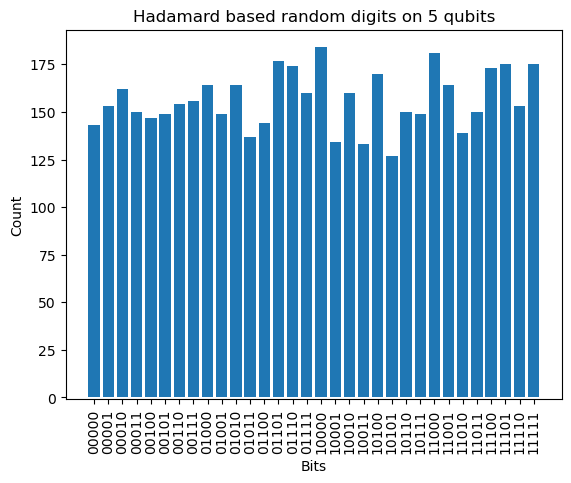

In [151]:

# Plot
plt.bar(labels, values)
# Set custom tick labels
plt.xticks(ticks=labels, labels=string_data, rotation='vertical')
plt.xlabel('Bits')
plt.ylabel('Count')
plt.title(f'Hadamard based random digits on {num_qubits} qubits')
plt.ylim(bottom=-1)
plt.savefig(fig_name + 'per_state_count.png')

plt.show()

'/home/jovyan/BenchmarkingQuantinuumH1/fig/20240426_backend_H1-1E_shots_5000_qubits_5_per_state_count.png'